In [ ]:
# imports
%cd /content/drive/My\ Drive/Thesis/
from NNClasses import *
from NNDataLoader import *
from train_util import *
import os
import pickle
from copy import deepcopy
from itertools import product
import matplotlib.pyplot as plt
from matplotlib import cm
from tqdm.auto import tqdm
from time import time, sleep
from torch.utils.data import DataLoader, SubsetRandomSampler
import torch.optim as optim
from sklearn.model_selection import KFold

# https://github.com/pytorch/pytorch/issues/16797
class CPU_Unpickler(pickle.Unpickler):
    def find_class(self, module, name):
        if module == 'torch.storage' and name == '_load_from_bytes':
            return lambda b: torch.load(io.BytesIO(b), map_location='cpu')
        else: return super().find_class(module, name)
        
%load_ext autoreload
%autoreload 1
%aimport NNClasses
%aimport NNDataLoader

/content/drive/My Drive/Thesis


In [ ]:
L_range = [8,16,24,32,40,48,56,64]
assert len(L_range) == 8
train_on_vortex = False 

Tc0 = .894 #from "Critical behavior of the two-dimensional XYmodel", Gupta & Baillie, 1992

64000
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


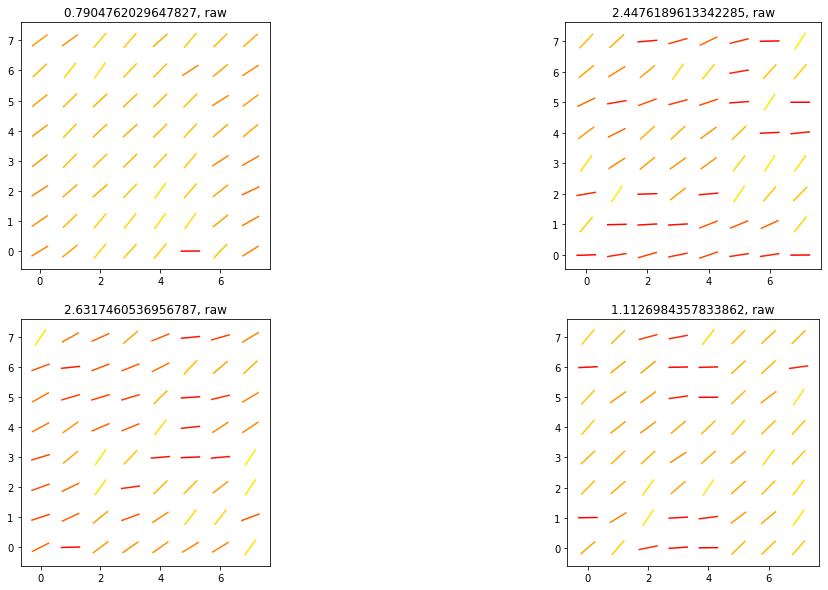

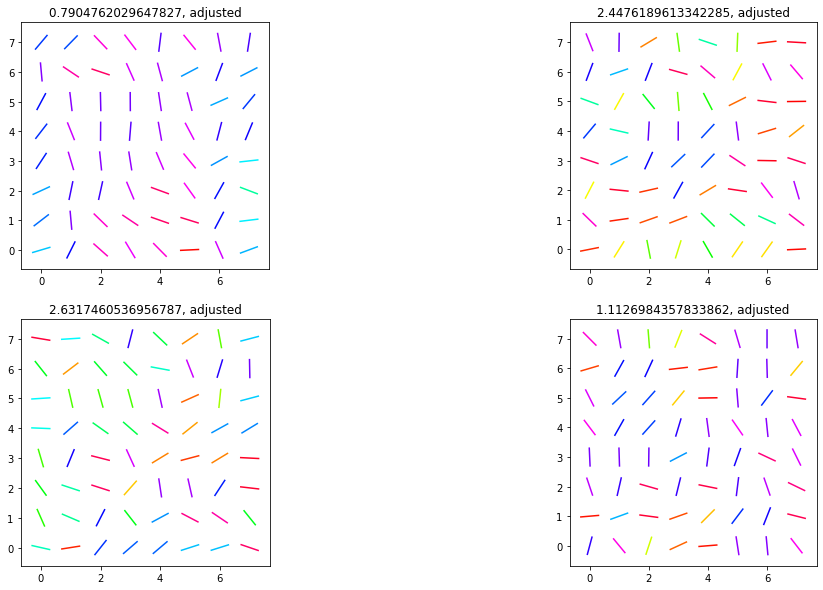

In [ ]:
for L in L_range:
  # load data
  train_data = load_data_from_pickle(L, Tc0, pathToThesis="", trainSet=True, train_on_vortex=train_on_vortex)
  train_data.max_size = len(train_data)
  print(len(train_data))
  # plot grid with and without multiplication
  fig1 = plt.figure(figsize=(18, 10))  # plot the calculated values
  fig2 = plt.figure(figsize=(18, 10))  # plot the calculated values
  from util import plotXYGrid
  for i in range(4):
    sp = fig1.add_subplot(2,2,i+1)
    sp2 = fig2.add_subplot(2, 2, i+1)
    idx = np.random.randint(0,high=train_data.configs.shape[0])
    sp.set_title(f"{train_data.Ts[idx].cpu().numpy()}, raw")
    sp2.set_title(f"{train_data.Ts[idx].cpu().numpy()}, adjusted")
    print(type(train_data.configs[idx].cpu().numpy()))
    plotXYGrid(sp, train_data.configs[idx].cpu().numpy())
    plotXYGrid(sp2, train_data.configs[idx].cpu().numpy()*2*np.pi)
  break

In [26]:
data_root = os.path.join("data", "train_rescaled")

for L in L_range:
  # load data
  train_data = load_data_from_pickle(L, Tc0, pathToThesis="", trainSet=True, train_on_vortex=train_on_vortex)
  train_data.max_size = len(train_data)
  print(f"{L}: Dataset loaded.")

  # construct new RESCALED dataset
  train_data_new = train_data
  train_data_new.configs = train_data.configs * 2 * np.pi
  print(f"{L}: Dataset rescaled.")

  # save to new file
  with open(f"dataset_julia_L={L}", mode="wb") as f:
    pickle.dump(train_data_new, f)
  print(f"{L}: Dataset saved.")
  

8: Dataset loaded.
8: Dataset rescaled.
8: Dataset saved.
16: Dataset loaded.
16: Dataset rescaled.
16: Dataset saved.
24: Dataset loaded.
24: Dataset rescaled.
24: Dataset saved.
32: Dataset loaded.
32: Dataset rescaled.
32: Dataset saved.
40: Dataset loaded.
40: Dataset rescaled.
40: Dataset saved.
48: Dataset loaded.
48: Dataset rescaled.
48: Dataset saved.
56: Dataset loaded.
56: Dataset rescaled.
56: Dataset saved.
64: Dataset loaded.
64: Dataset rescaled.
64: Dataset saved.


In [24]:

testloc = "test.dump"
testloc = os.path.join(data_root, testloc)


with open(testloc, mode="wb") as f:
  pickle.dump(train_data_new, f)

with open(testloc, mode="rb") as f:
  testing = pickle.load(f)
